In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

* Will explore the dataset and perform typical EDA steps before moving onto prediction.

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Will look at each of the columns with missing values and deciding what approach to take in filling those in. 

1. Age
2. Cabin
3. Embarked 

In [5]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

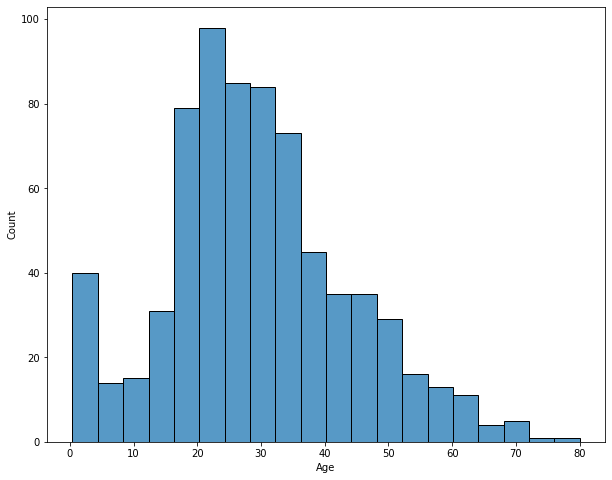

In [6]:
plt.figure(figsize=(10,8))
sns.histplot(train['Age'])
plt.show()

In [7]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


Will use a simple approach to filling in age, which is to fill in the mean.

In [8]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [9]:
train['Age'].isna().sum()

0

In [10]:
train[train['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


Is there any relationship between missing cabin values and class?

In [11]:
train[train['Cabin'].isnull()]['Pclass'].value_counts()

3    479
2    168
1     40
Name: Pclass, dtype: int64

In [12]:
print(f'There are {train[train["Pclass"]==3].shape[0]} 3rd class passengers, out of which {train[(train["Pclass"]==3) & (train["Cabin"].isnull())].shape[0]} don\'t have a cabin number.')

There are 491 3rd class passengers, out of which 479 don't have a cabin number.


- Majority of missing values are in the 3rd class passengers. 

We know that cabins and classes mean that passengers would be in different locations on the ship, which may impact their survival based on how quickly they can get to a life boat. However as we are missing so many values, will take class as a proxy for the cabin location and drop the column entirely. 

In [13]:
train.drop(columns=['Cabin'], inplace = True)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [15]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [17]:
train.Embarked.fillna('S', inplace=True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


- We're unlike to the get much value out of PassengerID, Name and Ticket, so will drop those columns.

In [20]:
train.drop(columns=['PassengerId','Ticket', 'Name'], inplace=True)

In [21]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


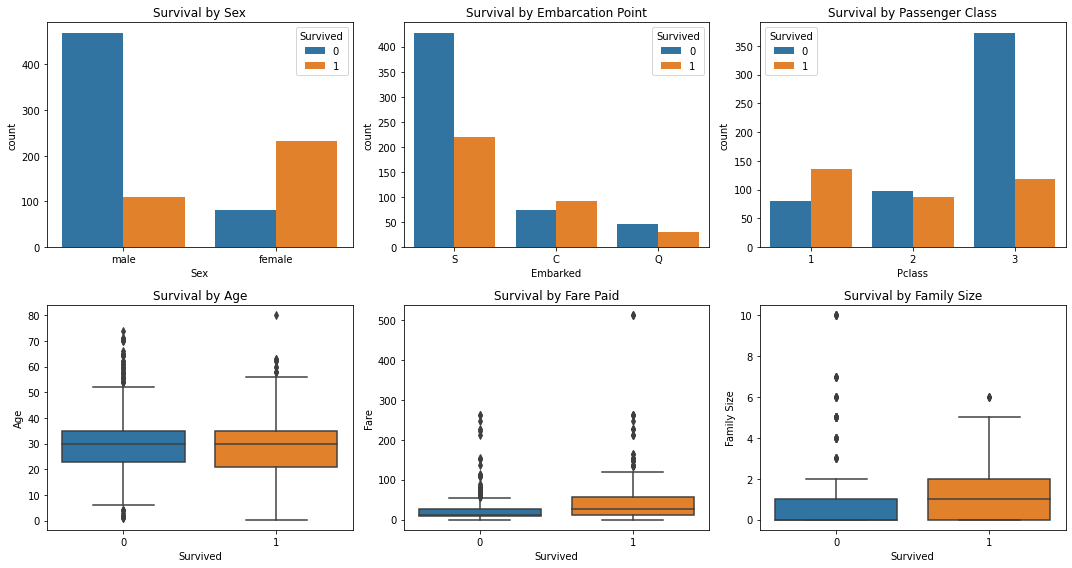

In [22]:
plt.subplots(2,3, figsize=(15,8))

plt.subplot(2,3,1)
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title('Survival by Sex')

plt.subplot(2,3,2)
sns.countplot(data=train, x='Embarked', hue='Survived')
plt.title('Survival by Embarcation Point')

plt.subplot(2,3,3)
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')

plt.subplot(2,3,4)
sns.boxplot(data=train, y='Age', x='Survived')
plt.title('Survival by Age')

plt.subplot(2,3,5)
sns.boxplot(data=train, y='Fare', x='Survived')
plt.title('Survival by Fare Paid')

plt.subplot(2,3,6)
sns.boxplot(data=train, y=train['SibSp']+train['Parch'], x='Survived')
plt.ylabel('Family Size')
plt.title('Survival by Family Size')

plt.tight_layout()
plt.show()

- Females had a higher survival rate 
- Southampton had the most passengers and therefore the most that survived, but the chances of survival were best from Cherbourg perhaps those included higher fare or passengers in class 1 or 2
- Younger people had a slightly higher survival rate
- Passenger class also was a big determinant of survival with class 1 and 2 improving the survival changes - similarly there is a slight improvement in survival rate for those that paid a bit more for their fare
- Larger family sizes on board has a better survival rate

**Note:**
- Will encode Sex and Embarked as numerical values

In [23]:
train['Female'] = [1 if (x == 'female') else 0 for x in train['Sex']]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Female
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [24]:
train.drop(columns=['Sex'], inplace = True)

In [25]:
train['Embarked_S'] = [1 if (x == 'S') else 0 for x in train['Embarked']]
train['Embarked_C'] = [1 if (x == 'C') else 0 for x in train['Embarked']]
train['Embarked_Q'] = [1 if (x == 'Q') else 0 for x in train['Embarked']]
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Female,Embarked_S,Embarked_C,Embarked_Q
0,0,3,22.0,1,0,7.2500,S,0,1,0,0
1,1,1,38.0,1,0,71.2833,C,1,0,1,0
2,1,3,26.0,0,0,7.9250,S,1,1,0,0
3,1,1,35.0,1,0,53.1000,S,1,1,0,0
4,0,3,35.0,0,0,8.0500,S,0,1,0,0


In [26]:
train.drop(columns=['Embarked'], inplace=True)

In [27]:
train['Family Size'] = train['SibSp']+train['Parch']

# Relationship between survival and features

In [28]:
import statsmodels.api as sm
from scipy import stats


In [29]:
data = []

y = train['Survived']

for column in train.corr().columns:
    data.append(stats.pearsonr(y, train[column]))

corr = pd.DataFrame(data, index=train.corr().columns, columns=['Correlation', 'P_value'])

corr.style.background_gradient(cmap='Oranges')

,Correlation,P_value
Survived,1.000000,0.000000
Pclass,-0.338481,0.000000
Age,-0.069809,0.037217
SibSp,-0.035322,0.292244
Parch,0.081629,0.014799
Fare,0.257307,0.000000
Female,0.543351,0.000000
Embarked_S,-0.149683,0.000007
Embarked_C,0.168240,0.000000
Embarked_Q,0.003650,0.913353


- Only Siblings and Embarked at Queenstown seem to have statistically insignificant correlations with survival.
- Female and Fare having the strongest correlations.
- Interestingly however Class and Fare show different correlation coefficients, whereas I was expecting them to show some collinearity assuming that fare would be correlated with Class.

In [30]:
stats.pearsonr(train['Pclass'],train['Fare'])

(-0.5494996199439078, 1.967386173420501e-71)

Due to the ordinal nature of the ```Pclass``` column, where 1 is the highest value and 3 is the lowest, when running the correlation between class and fare we see that as one increases the other is likely to decrease. For example if Fare goes up, then Class will go down towards 1. 

<Figure size 432x288 with 0 Axes>

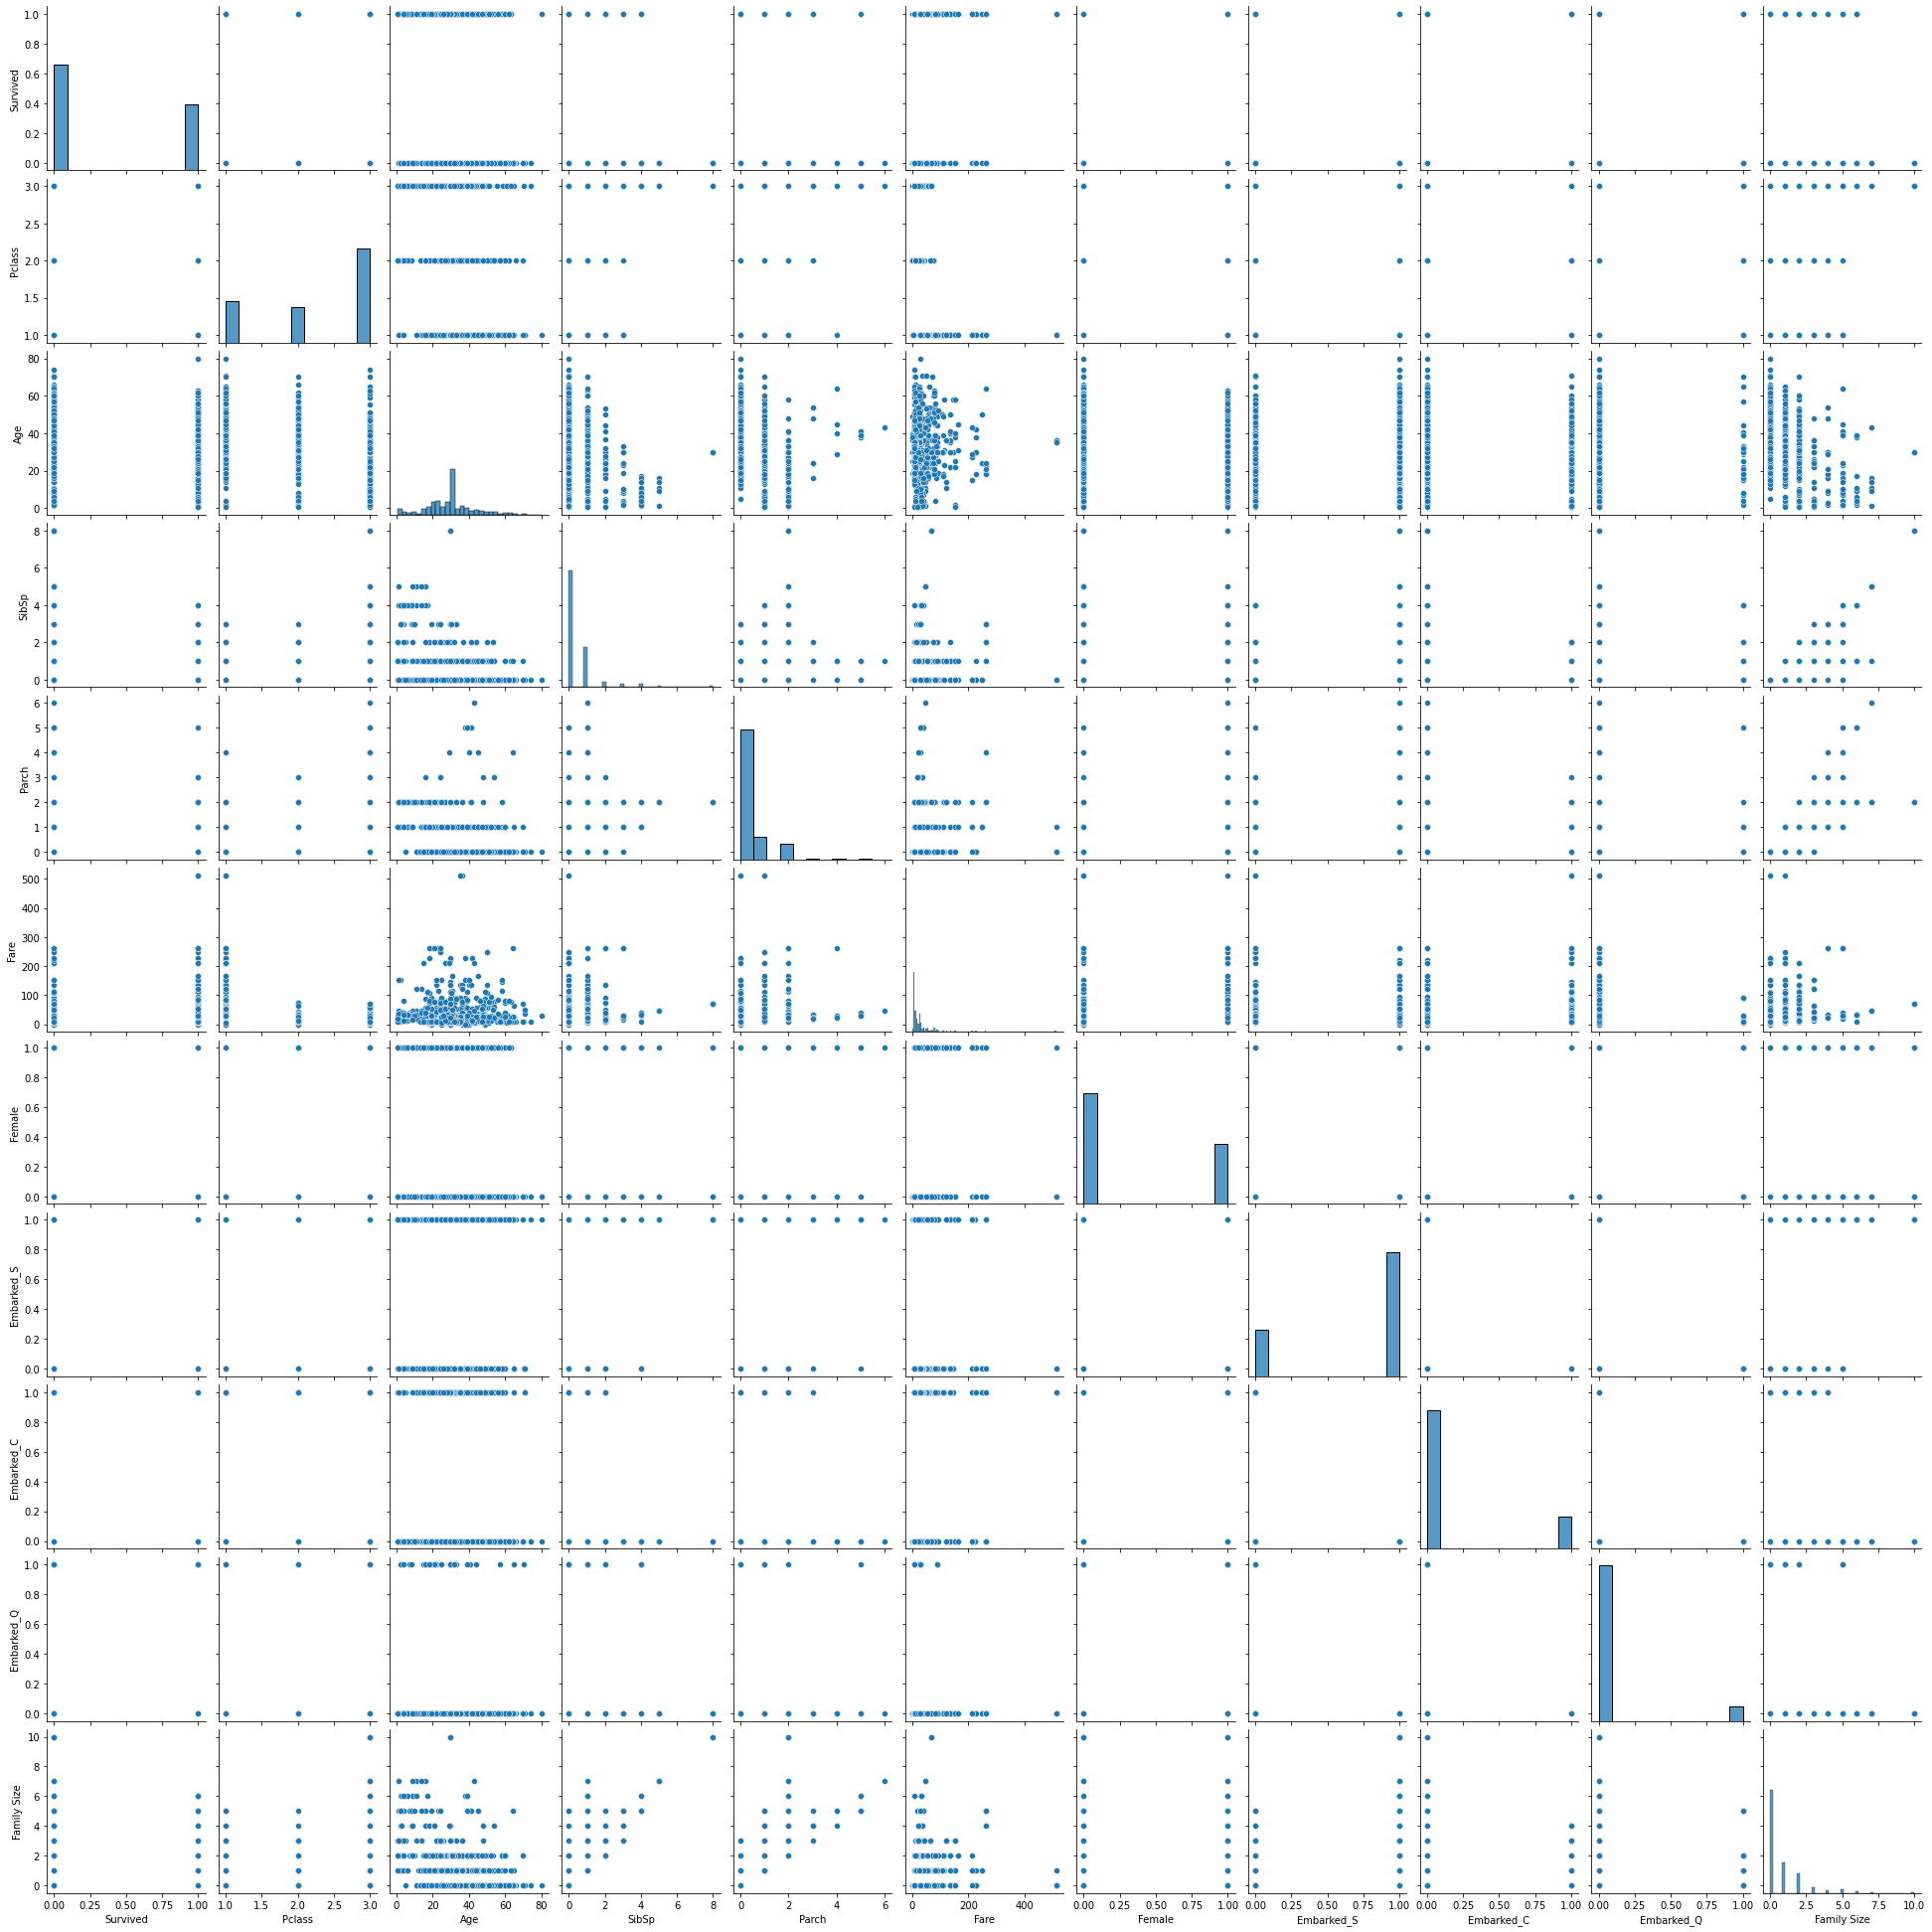

In [31]:
plt.figure()
sns.pairplot(train)
plt.show()

# Simple Logistic Regression Model

In [32]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Female,Embarked_S,Embarked_C,Embarked_Q,Family Size
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,1
2,1,3,26.0,0,0,7.9250,1,1,0,0,0
3,1,1,35.0,1,0,53.1000,1,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,0


In [33]:
X = train.drop(columns=['Survived'])
X_const = sm.add_constant(X)

model = sm.Logit(y, X_const)

model_result = model.fit(maxiter=500)
model_result.summary()

Optimization terminated successfully.
         Current function value: 0.440392
         Iterations 96


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Thu, 24 Nov 2022   Pseudo R-squ.:                  0.3387
Time:                        19:01:01   Log-Likelihood:                -392.39
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 7.435e-82
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8079   3.23e+06   5.59e-07      1.000   -6.34e+06    6.34e+06
Pclass         -1.1022      0.144     -7.675      0.000      -1.384      -0.821
Age            -0.0397      0.008     -5.061      0.000      -0.055      -0.024
SibSp          -0.1864    4.5e+06  -4.15e-08      1.000   -8.81e+06    8.81e+06
Parch           0.0459    4.5e+06   1.02e-08      1.000   -8.81e+06    8.81e+06
Fare            0.0020      0.002      0.823      0.410      -0.003       0.007
Female          2.7272      0.201     13.597      0.000       2.334       3.120
Embarked_S      0.3376   3.23e+06   1.04e-07      1.000   -6.34e+06    6.34e+06
Embarked_C      0.7515   3.23e+06   2.32e-07      1.000   -6.34e+06    6.34e+06
Embarked_Q      0.7188   3.23e+06   2.22e-07      1.000   -6.34e+06    6.34e+06
Family Size    -0.1405    4.5e+06  -3.12e-08      1.000   -8.81e+06    8.81e+06
===============================================================================
"""

In [34]:
predictions_prob = model_result.predict(X_const)
predictions = np.where(predictions_prob >= 0.5, 1, 0)
accuracy = (predictions == y).mean()
print(f"Our model accuracy is {accuracy.round(3)*100}%")

Our model accuracy is 80.10000000000001%


- Based on this we could remove the each of the variables that have P values greater than 0.05. However it may be better to look at fitting a few more advanced models to see how to get better results. We also likely have a few higly correlated values due to likely co-linearity between Family size and the variables that fed into it. 

In [35]:
X2 = train.drop(columns=['Survived', 'Embarked_S','Embarked_C', 'Embarked_Q', 'Fare', 'Parch', 'Family Size'])
X2_const = sm.add_constant(X2)

model2 = sm.Logit(y, X2_const)

model2_result = model2.fit()
model2_result.summary()

Optimization terminated successfully.
         Current function value: 0.443796
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Thu, 24 Nov 2022   Pseudo R-squ.:                  0.3336
Time:                        19:01:02   Log-Likelihood:                -395.42
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.236e-84
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4522      0.424      5.779      0.000       1.621       3.284
Pclass        -1.1724      0.120     -9.792      0.000      -1.407      -0.938
Age           -0.0398      0.008     -5.131      0.000      -0.055      -0.025
SibSp         -0.3578      0.104     -3.439      0.001      -0.562      -0.154
Female         2.7398      0.194     14.112      0.000       2.359       3.120
==============================================================================
"""

In [36]:
predictions_prob2 = model2_result.predict(X2_const)
predictions2 = np.where(predictions_prob2 >= 0.5, 1, 0)
accuracy2 = (predictions2 == y).mean()
print(f"Our second model accuracy is {accuracy2.round(3)*100}%")

Our second model accuracy is 78.8%


- The changes we made to this model has actually decrease, so likely some of the variables we removed held some predictive values for the model. 
- Let's look at what the remaining variables and their co-efficients tell us. 

# Model Evaluation and Interpretation

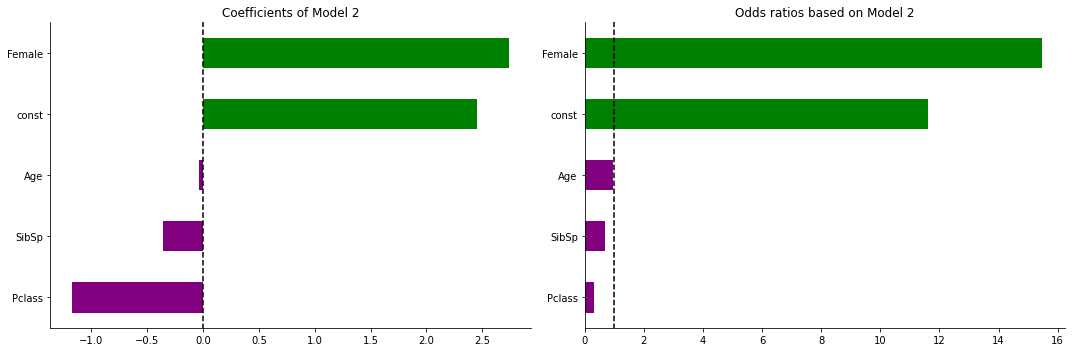

In [37]:
coefs_df = pd.DataFrame(data={"coefs": model2_result.params, "odds_ratios": np.exp(model2_result.params)})

plt.subplots(1,2, figsize=(15,5))
plt.subplot(1,2,1)
coefs_df["coefs"].sort_values().plot(
    kind="barh", 
    color=np.where(coefs_df["coefs"].sort_values() <= 0, "purple", "green"),
)
sns.despine()
plt.vlines(0, ymin=-1, ymax=10, color="black", linestyle="--")
plt.title("Coefficients of Model 2")

plt.subplot(1,2,2)
coefs_df["odds_ratios"].sort_values().plot(
    kind="barh", 
    color=np.where(coefs_df["odds_ratios"].sort_values() <= 1, "purple", "green"))
sns.despine()
plt.vlines(1, ymin=-1, ymax=10, color="black", linestyle="--")
plt.title("Odds ratios based on Model 2")
plt.tight_layout()
plt.show()

- The main takeaway from this view is that being female increases the chances of survival by nearly 16 times. We could argue that this was the most important factor in predicting whether a person survived on the Titanic. 
- Looking at the coefficient of Pclass - we could also argue that higher the class value, e.g. 3rd class, the less likely they were to survive.

In [38]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Female,Embarked_S,Embarked_C,Embarked_Q,Family Size
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,1
2,1,3,26.0,0,0,7.9250,1,1,0,0,0
3,1,1,35.0,1,0,53.1000,1,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,0


Will make a few changes to the training dataset based on what we've seen in our initial attempt at predicting survival. 

- Remove:
    - Age - had a minimal impact on prediction 
    - SibSp and Parch - will remove those, but will binarise them to see if having family improved survival rate rather than how large the family size was
    - Embarked_X - those variables proved to be statistically insignificant in the prediction 
    - Fare - Again seemed to be statistically insignificant - and should be atleast partially captured by Class

In [39]:
train_modelling = train.copy()
train_modelling['Family'] = [1 if (x > 0) else 0 for x in train_modelling['Family Size']]
train_modelling = train_modelling.drop(columns=['Age', 'SibSp', 'Fare','Parch', 'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Family Size'])
train_modelling.head()

,Survived,Pclass,Female,Family
0,0,3,0,1
1,1,1,1,1
2,1,3,1,0
3,1,1,1,1
4,0,3,0,0


In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve, confusion_matrix, confusion_matrix, plot_confusion_matrix, roc_curve, auc

In [41]:
X_train, X_test, y_train, y_test = train_test_split(train_modelling.drop(columns=['Survived']), y, test_size=0.2,)

print('Train Shape:',X_train.shape, y_train.shape)
print('Test Shape:', X_test.shape, y_test.shape)


Train Shape: (712, 3) (712,)
Test Shape: (179, 3) (179,)


In [42]:
print('*** Logistic Regression ***')
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print('Logistic Regression Train Score: ', log_reg.score(X_train, y_train))
print('Logistic Regression Test Score: ', log_reg.score(X_test, y_test))
print(' ')

# print('*** Support Vector Machine ***')
# svm_model = svm.SVC()
# svm_model.fit(X_train, y_train)
# print('SVM Train Score: ', svm_model.score(X_train, y_train))
# print('SVM Test Score: ', svm_model.score(X_test, y_test))
# print(' ')

print('*** k Neighbours ***')
k_ns = KNeighborsClassifier()
k_ns.fit(X_train, y_train)
print('kNeighbours Train Score: ', k_ns.score(X_train, y_train))
print('kNeighbours Test Score: ', k_ns.score(X_test, y_test))
print(' ')

print('*** Random Forest Classifier ***')
rand_forest = RandomForestClassifier(max_depth=5, random_state=1)
rand_forest.fit(X_train, y_train)
print('Random Forest Train Score: ', rand_forest.score(X_train, y_train))
print('Random Forest Test Score: ', rand_forest.score(X_test, y_test))
print(' ')

print('*** xGBoost Classifier ***')
boosted_model = xgb.XGBClassifier(max_depth=5, random_state=1)
boosted_model.fit(X_train, y_train)
print('XGB Train Score: ', boosted_model.score(X_train, y_train))
print('XGB Test Score: ', boosted_model.score(X_test, y_test))
print(' ')

*** Logistic Regression ***
Logistic Regression Train Score:  0.7893258426966292
Logistic Regression Test Score:  0.776536312849162
 
*** k Neighbours ***
kNeighbours Train Score:  0.7879213483146067
kNeighbours Test Score:  0.770949720670391
 
*** Random Forest Classifier ***
Random Forest Train Score:  0.8075842696629213
Random Forest Test Score:  0.7821229050279329
 
*** xGBoost Classifier ***
XGB Train Score:  0.8075842696629213
XGB Test Score:  0.7821229050279329
 
